# Lab 5: Networks

## Challenge 1

In this challenge, we will work with data on GitHub collaboration network in the pickle format, github_users.p. In this network, nodes are users, and edges indicate that two users are collaborators on at least one GitHub repository.

The workflow for this challenge consists of the following steps:
1. Load the GitHub network dataset
2. Describe network using basic graph measures: number of nodes and edges, their type and check attributes of an edge
3. Calculate the degree centrality of the GitHub collaboration network G:
   - use the nx.degree_centrality() function to calculate degree centralities,
   - convert these values into a list
   - use the list to create a histogram to visualize the distribution of degree centralities
4. Make a subset of the initial network
   - our subset contains first 5 nodes of the original network and their corresponding edges
   - Plot the subset graph created
5. Calculate betweenness centrality of our original network
   - use the nx.degree_centrality() function to calculate degree centralities,
   - convert these values into a list
   - use the list to create a histogram to visualize the distribution of degree centralities
6. Plot the Matrix, Arc and Circos from the subset.

In [1]:
import pickle
import networkx as nx
import nxviz as nv
import matplotlib.pyplot as plt

/Users/ninabucekova/miniconda3/envs/ua/lib/python3.10/site-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


#### 1.1 Load the data

In [3]:
# Load github users data
import pickle 
with open('Lab5_Data/github_users.p', 'rb') as f:
    G = pickle.load(f)
G

#### 1.2 Calculate basic network measures

In [4]:
# Print number of nodes and edges 
print(len(G))
print(G.number_of_edges())

# Get type of nodes
print(type(G.nodes())) 

# Read the attributes associated with the first element of the edges list
print(list(G.edges(data=True))[0]) 

# Read the attributes associated with the firts element of the node list.
print(list(G.nodes(data=True))[0]) 

56519
72900
<class 'networkx.classes.reportviews.NodeView'>
('u1', 'u3124', {})
('u1', {'bipartite': 'users'})


In [5]:
# Use list comprehension to filter nodes with more than 200 edges
nodes200 = [n for n in G.nodes() if G.degree(n) > 200]
print(len(nodes200))
print(nodes200)

33
['u75', 'u115', 'u172', 'u264', 'u397', 'u587', 'u627', 'u664', 'u698', 'u719', 'u724', 'u741', 'u935', 'u982', 'u1204', 'u1387', 'u1571', 'u1648', 'u1687', 'u1851', 'u2008', 'u2170', 'u2476', 'u2925', 'u3075', 'u3082', 'u3683', 'u4209', 'u4296', 'u6664', 'u6980', 'u7025', 'u7952']


In [6]:
# Use list comprehension to filter nodes with more than 200 edges
nodes0 = [n for n in G.nodes() if G.degree(n) == 0]
print(len(nodes0))

50673


The two cell above calculate number of nodes in the network with a very high degree (>200) and zero degree. As we can see, there are relatively few nodes with a very high degree (GitHub users with a very large number of collaborators), while the majority of them (>50000) have degree 0 (0 collaborators). This suggest that our network is very sparse.

#### 1.3 Calculate degree centrality and plot the distribution
Now, we calculate degree centrality of nodes in our network using the degree_centrality() function. Next, we use a list comprehension to convert it into a list so that we can then plot it.

In [7]:
# Calculate degree centrality
degree_centrality_G = nx.degree_centrality(G)

In [8]:
# Convert degree centrality values into a list
degree_centrality_list = [v for n, v in degree_centrality_G.items()]

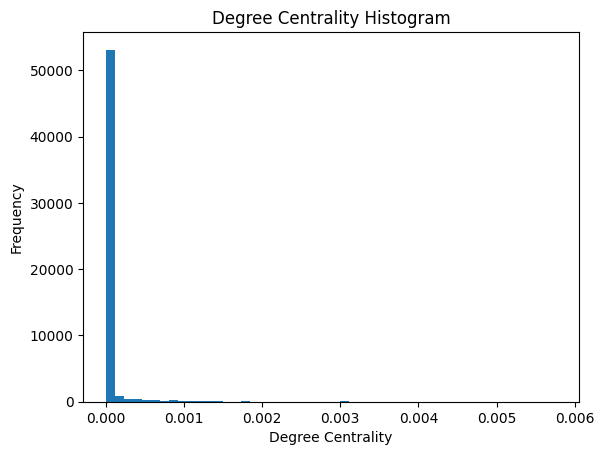

In [9]:
# Plot histogram
plt.hist(degree_centrality_list, bins=50)  
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.title('Degree Centrality Histogram')
plt.show()

The histogram above illustrates that fast majority of nodes have very low degree centrality which is expected given the sparse nature of this# network.

#### 1.4 Subset the network and plot it
Here we subset and plot the network of GitHub users such that it includes the first nodes u7 to u9 and their corresponing edges. 

In [10]:
# Filter nodes 7 to 9
nodes_subset = list(G.nodes())[6:9]

# Get edges of these nodes
edges_subset=G.edges(nodes_subset)

# Use the subsetted edges to create a graph
subset = nx.Graph(edges_subset)

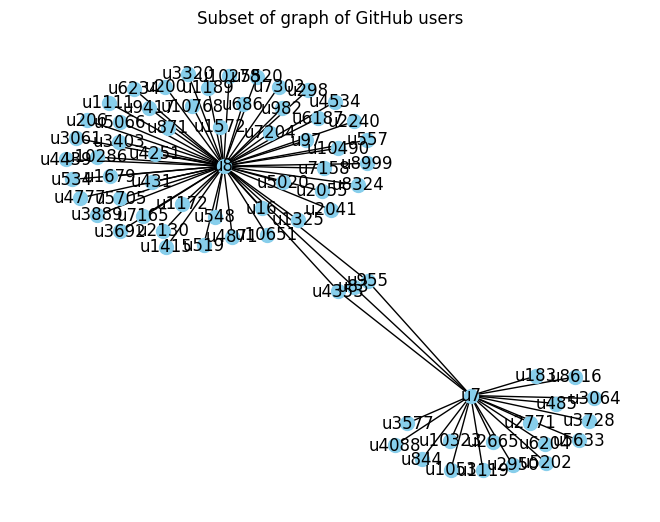

In [11]:
# Plot the resulting graph
pos = nx.spring_layout(subset)
nx.draw(subset, pos, with_labels=True, node_size=100, node_color='skyblue')
plt.title('Subset of graph of GitHub users')
plt.show()

#### 1.5 Calculate another network measure: Betweenness Centrality
Next, we calculate another network measure - betweenness centrality. We only work with the subset we created above because if we use the whole original network, kernel crashes.

In [12]:
# Calculate betweenness centrality 
btw_centrality = nx.betweenness_centrality(subset)

# Convert degree centrality values into a list
btw_centrality_list = [v for n, v in btw_centrality.items()]

Again, it is interesting to look at the distribution of the centrality measure.

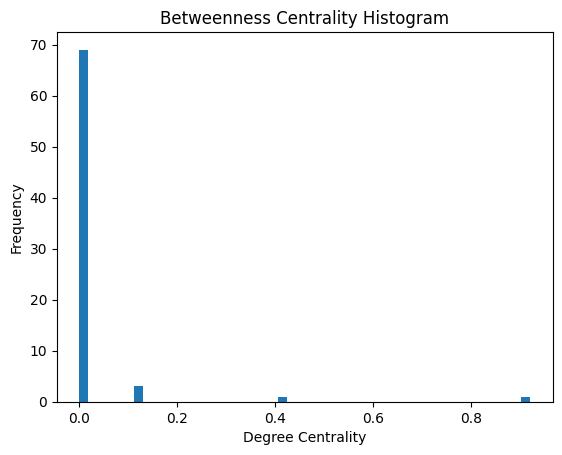

In [13]:
# Plot histogram
plt.hist(btw_centrality_list, bins=50)  
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.title('Betweenness Centrality Histogram')
plt.show()

#### 1.6 Plot the network

Lastly, we utilize visualization tools available in nxviz to plot a graph. To make the visualizations more interesting, we quickly create a new, larger subset and then plot it in three different ways.

In [14]:
# Filter first 20 nodes
nodes_subset2 = list(G.nodes())[:20]

# Get edges of these nodes
edges_subset2=G.edges(nodes_subset2)

# Use the subsetted edges to create a graph
subset2 = nx.Graph(edges_subset2)

/Users/ninabucekova/miniconda3/envs/ua/lib/python3.10/site-packages/nxviz/api.py:275: UserWarning: As of nxviz 0.7, the object-oriented API is being deprecated in favour of a functional API. Please consider switching your plotting code! The object-oriented API wrappers remains in place to help you transition over. A few changes between the old and new API exist; please consult the nxviz documentation for more information. When the 1.0 release of nxviz happens, the object-oriented API will be dropped entirely.
  warnings.warn(


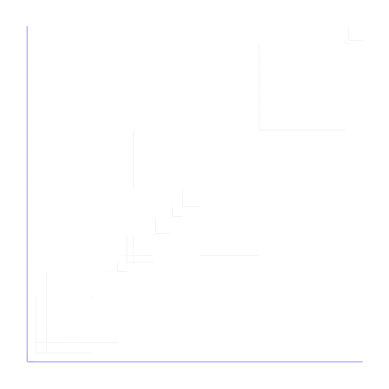

In [15]:
nv.MatrixPlot(subset2)

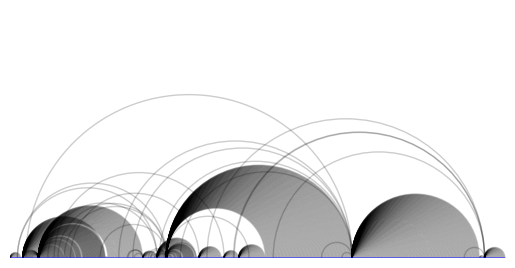

In [155]:
nv.ArcPlot(subset2)

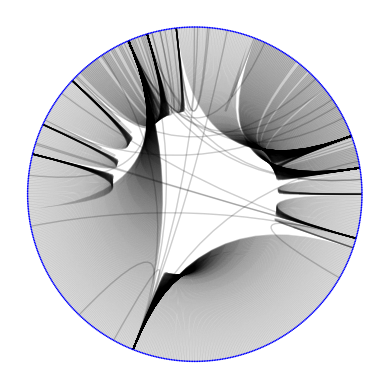

In [156]:
nv.CircosPlot(subset2)

# Challenge 2

In this challenge, we will use the library OSMnx to explore and analyze Bratislava's street network. The workflow for this challenge is as follows:

1. Use OSMnx to download Bratislava's street network
2. Calculate basic statistics for the street network using the function basic_stats()
3. Use OSMnx to plot the street network
4. Utilize the routing capabilities of OSMnx:
   - find the shortest path between two points in the street network: bus station and Bratislava castle
   - plot the route on top of the street network.
5. Calculate the centrality measures (e.g., degree centrality and betweenness_centrality) for nodes in the street network.
6. Create the figure-groud from the selected city
7. Create interactive maps to plot nodes, edges, both nodes and edges and one of the centrality measures
8. Export the street network to a GeoPackage (.gpkg) file
9. Extract other urban elements including railways and highways

In [16]:
import networkx as nx
import osmnx as ox

#### 2.1 Download the street network of a city: Bratislava

In [17]:
# Download the street network of a city: Bratislava
B = ox.graph_from_place('Bratislava', network_type="drive", truncate_by_edge=True)

#### 2.2 Calculate basic network statistics
To calculate some basic graph statistics of our network, we first need to get area covered by the network. Then we can use the basic_stats function to get the basic statistics.

In [31]:
# The size of the area covered by the network
B_proj = ox.project_graph(B)
Bnodes_proj = ox.graph_to_gdfs(B_proj, edges=False)
graph_area_B = Bnodes_proj.unary_union.convex_hull.area
graph_area_B

254918030.3835712

In [32]:
# Calculate some basic stats about the network
ox.basic_stats(B_proj, area=graph_area_B, clean_int_tol=15)

{'n': 6407,
 'm': 13678,
 'k_avg': 4.269705010145154,
 'edge_length_total': 1758084.8599999968,
 'edge_length_avg': 128.53376663254838,
 'streets_per_node_avg': 2.7299828312782894,
 'streets_per_node_counts': {0: 0,
  1: 1197,
  2: 191,
  3: 4219,
  4: 754,
  5: 37,
  6: 9},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.1868269080692992,
  2: 0.02981114406118308,
  3: 0.6584985172467613,
  4: 0.11768378336194787,
  5: 0.005774933666302481,
  6: 0.001404713594506009},
 'intersection_count': 5210,
 'street_length_total': 1126784.5170000016,
 'street_segment_count': 8733,
 'street_length_avg': 129.02605255925818,
 'circuity_avg': 1.0612208462822859,
 'self_loop_proportion': 0.0025191801213786786,
 'clean_intersection_count': 3650,
 'node_density_km': 25.133569368786844,
 'intersection_density_km': 20.43794231487115,
 'edge_density_km': 6896.667361483351,
 'street_density_km': 4420.183677492511,
 'clean_intersection_density_km': 14.318328109266737}

#### 2.3 Plot Bratislava's street network

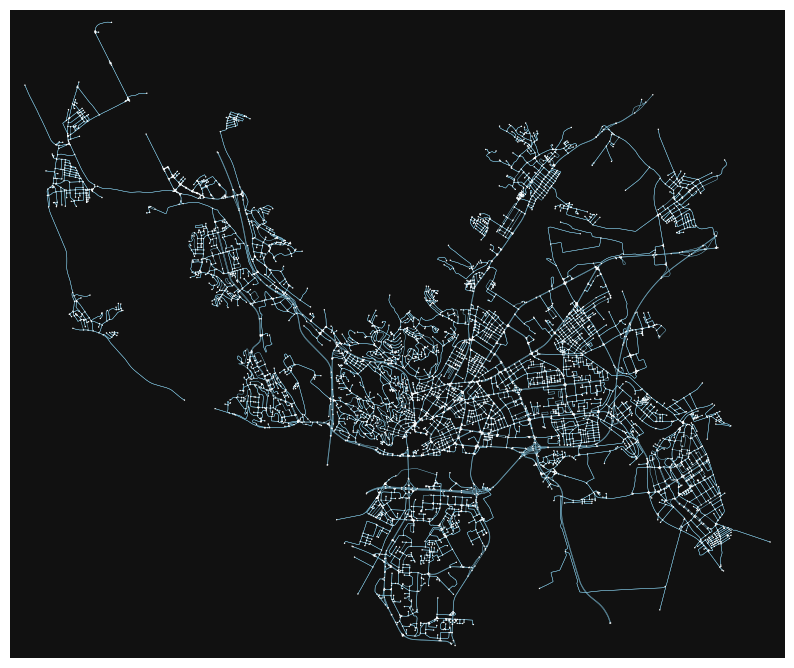

In [39]:
# Plot the street network
fig, ax = ox.plot_graph(B, figsize=(10, 10), node_size=1, edge_color="skyblue", edge_linewidth=0.3)

#### 2.4 Calculate shortest path
Here we calculate the shortest path between the Main bus station and Bratislava castle. To do so, we first add speed and travel times to our network, then use coordinates of these two locations and get the nearest nodes. Lastly, we can calculate the shortest path based on travel time.

In [44]:
# Add speed and travel times
B = ox.speed.add_edge_speeds(B)
B = ox.speed.add_edge_travel_times(B)

In [45]:
# Pick two locations (Bus station and Bratislava Castle) and get nearest nodes
orig_B = ox.distance.nearest_nodes(B, X=17.129446, Y=48.145549) 
dest_B = ox.distance.nearest_nodes(B, X=17.099812, Y=48.142296)

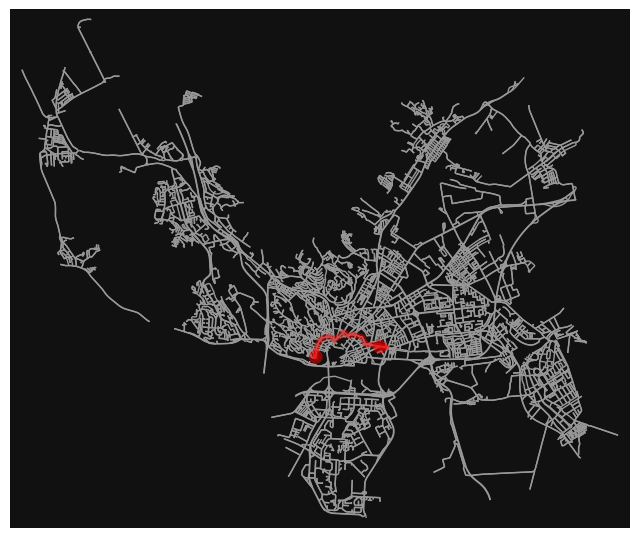

In [47]:
# Find the shortest path between nodes, minimizing travel time, then plot it
route_B = ox.shortest_path(B, orig_B, dest_B, weight="travel_time")
fig, ax = ox.plot_graph_route(B, route_B, node_size=0)

#### 2.5 Calculate the centrality measures

In [57]:
# Calculate degree centrality 
node_centrality_B = nx.degree_centrality(B)

In [ ]:
# It always crashes when trying to calculate betweenness centrality
btw_centrality_B = nx.betweenness_centrality(B)

#### 2.6 Create the figure-groud from the selected city
The code below creates a figure ground from Bratislava - the area around the Bratislava Castle.

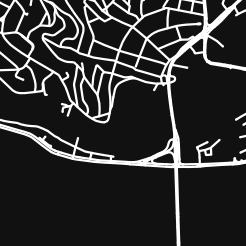

In [63]:
place = "bratislava"
point = (48.142296, 17.099812)
fp = f"./{img_folder}/{place}.{extension}"
fig, ax = ox.plot_figure_ground(
    point=point,
    network_type="drive",
    filepath=fp,
    dpi=dpi,
    save=True,
    show=False,
    close=True,
)
Image(fp, height=size, width=size)

#### 2. 7 Create interactive maps to plot nodes, edges, nodes+edges and one of the centrality measures.

In [ ]:
# Explore graph edges interactively
ox.graph_to_gdfs(B, nodes=False).explore()

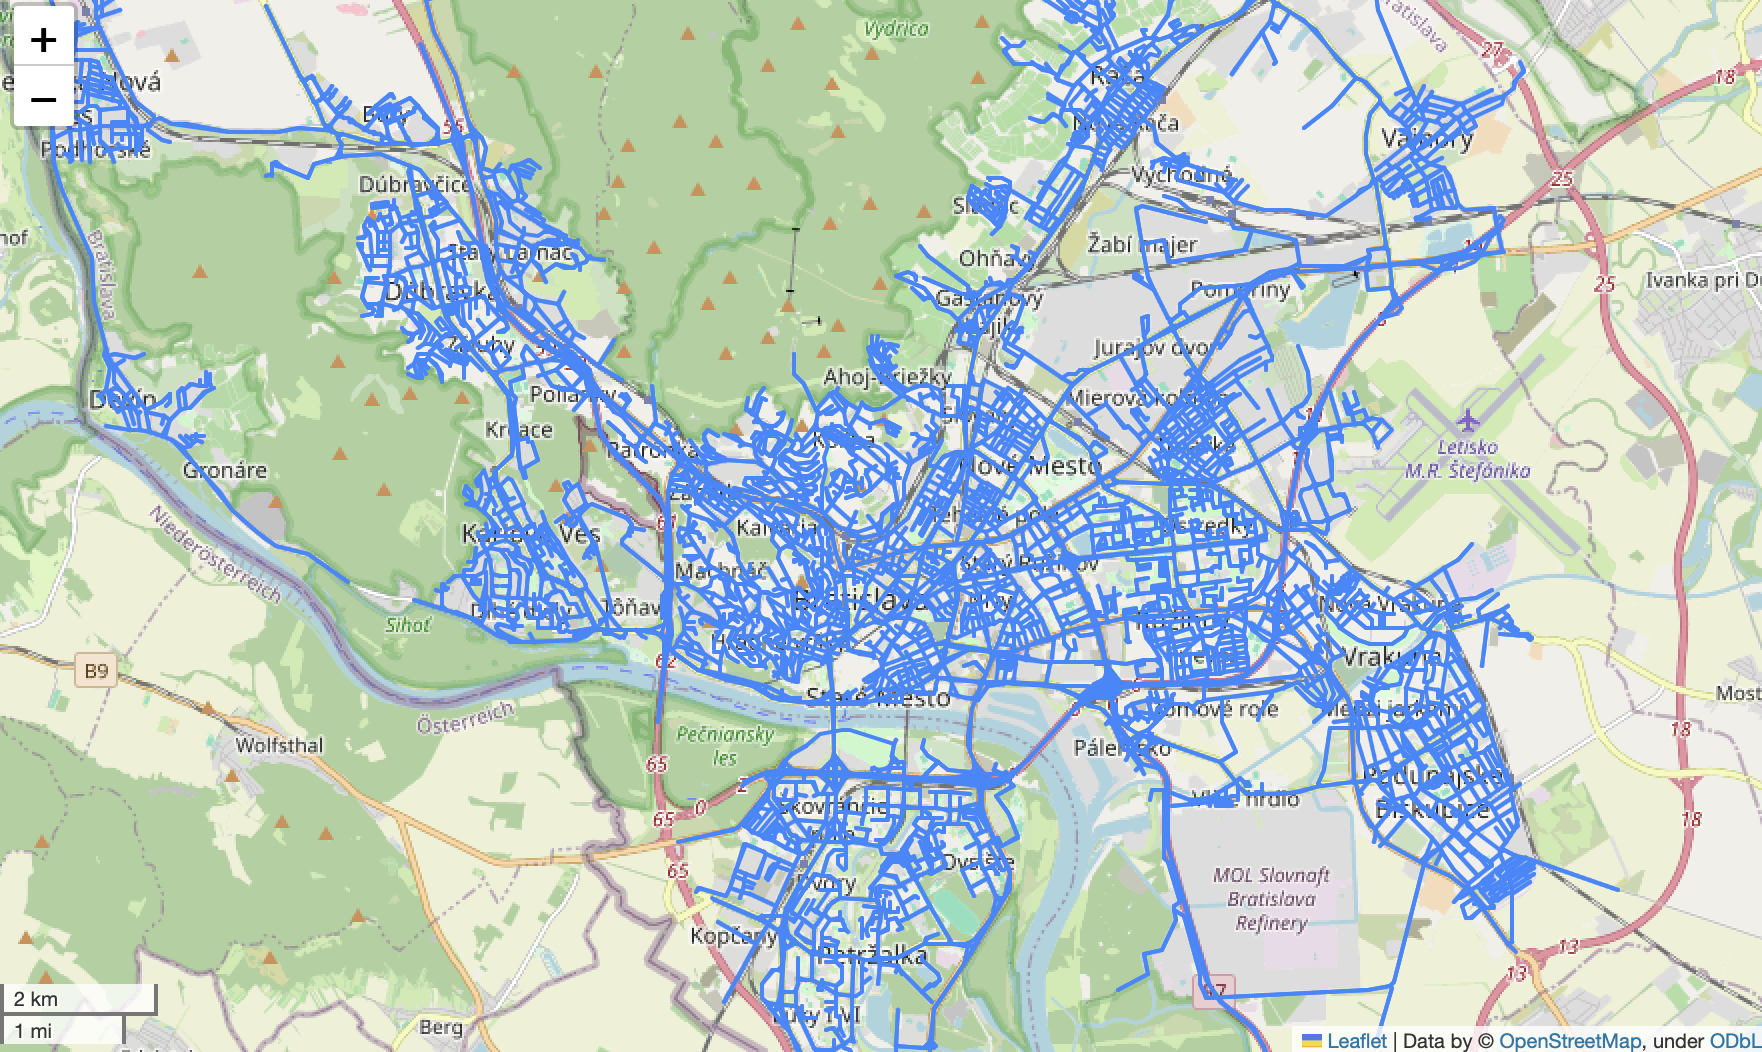

In [ ]:
# Explore graph nodes interactively with different basemap tiles
nodes_B = ox.graph_to_gdfs(B, edges=False)
nodes_B.explore(tiles="cartodbdarkmatter", color="skyblue", marker_kwds={"radius": 2})

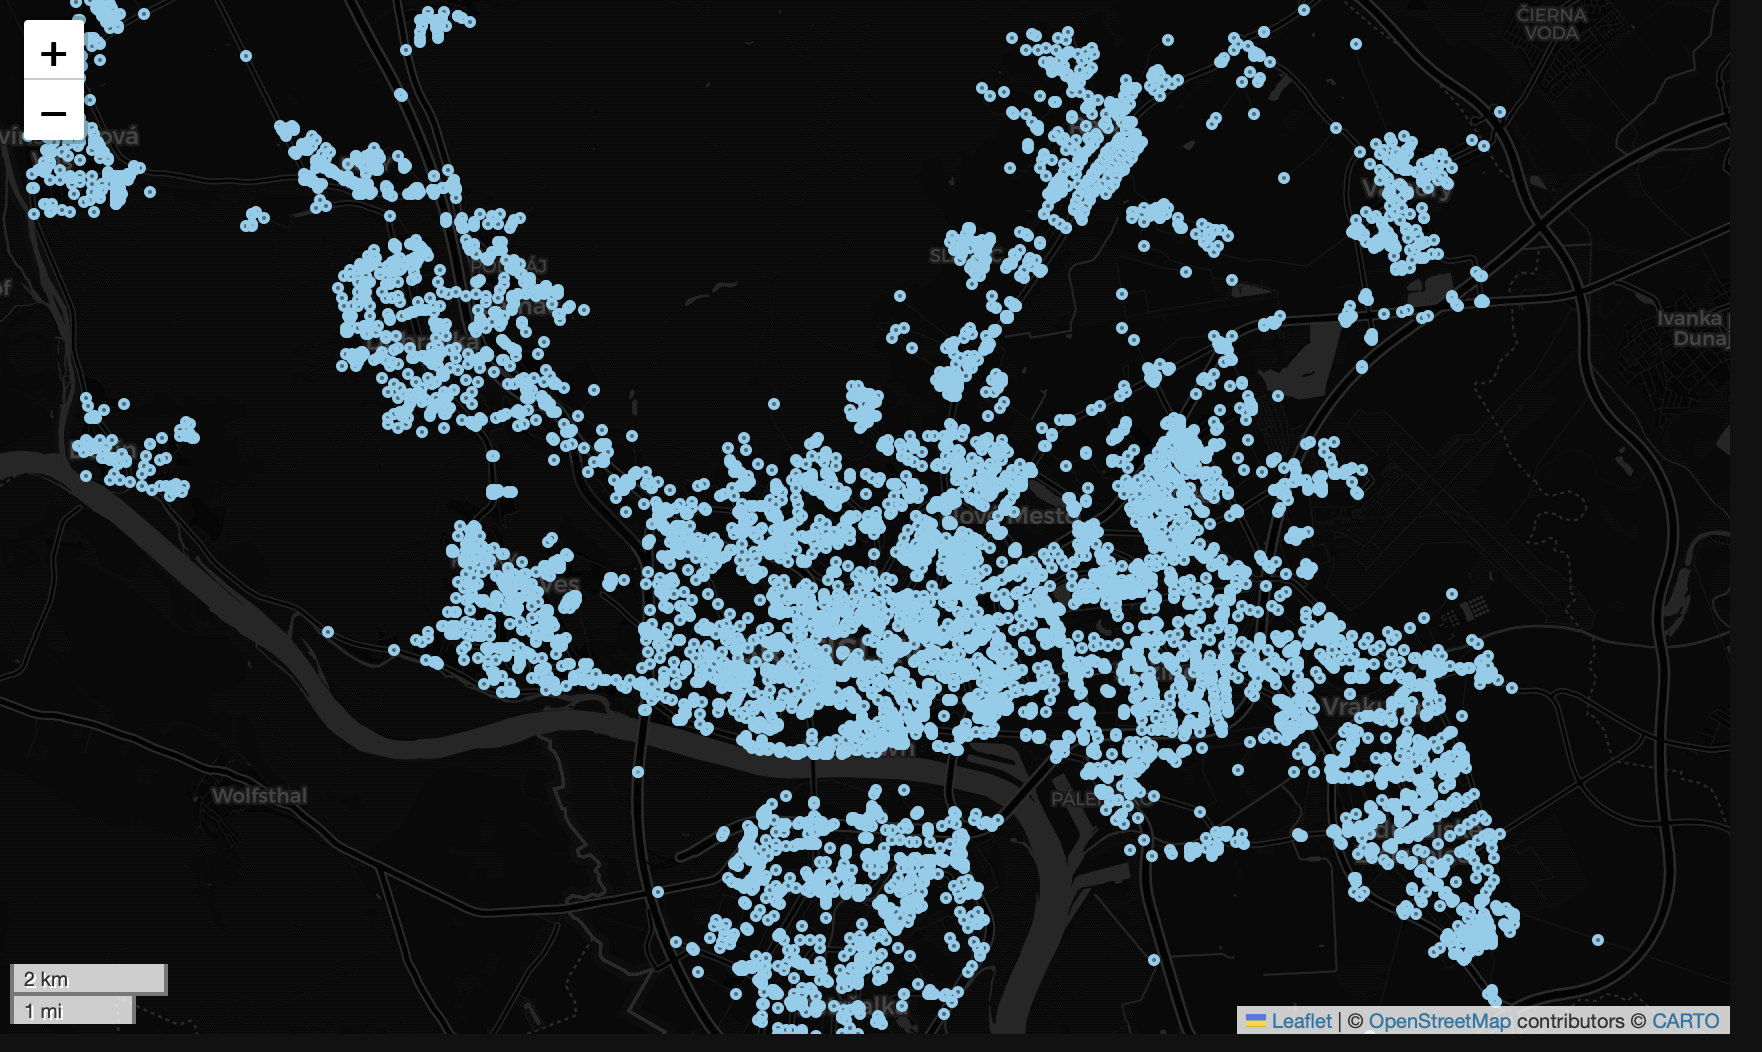

In [ ]:
# Explore nodes and edges together in a single map
nodes_B, edges_B = ox.graph_to_gdfs(B)
m_B = edges_B.explore(color="skyblue", tiles="cartodbdarkmatter")
nodes_B.explore(m=m_B, color="pink", marker_kwds={"radius": 1})

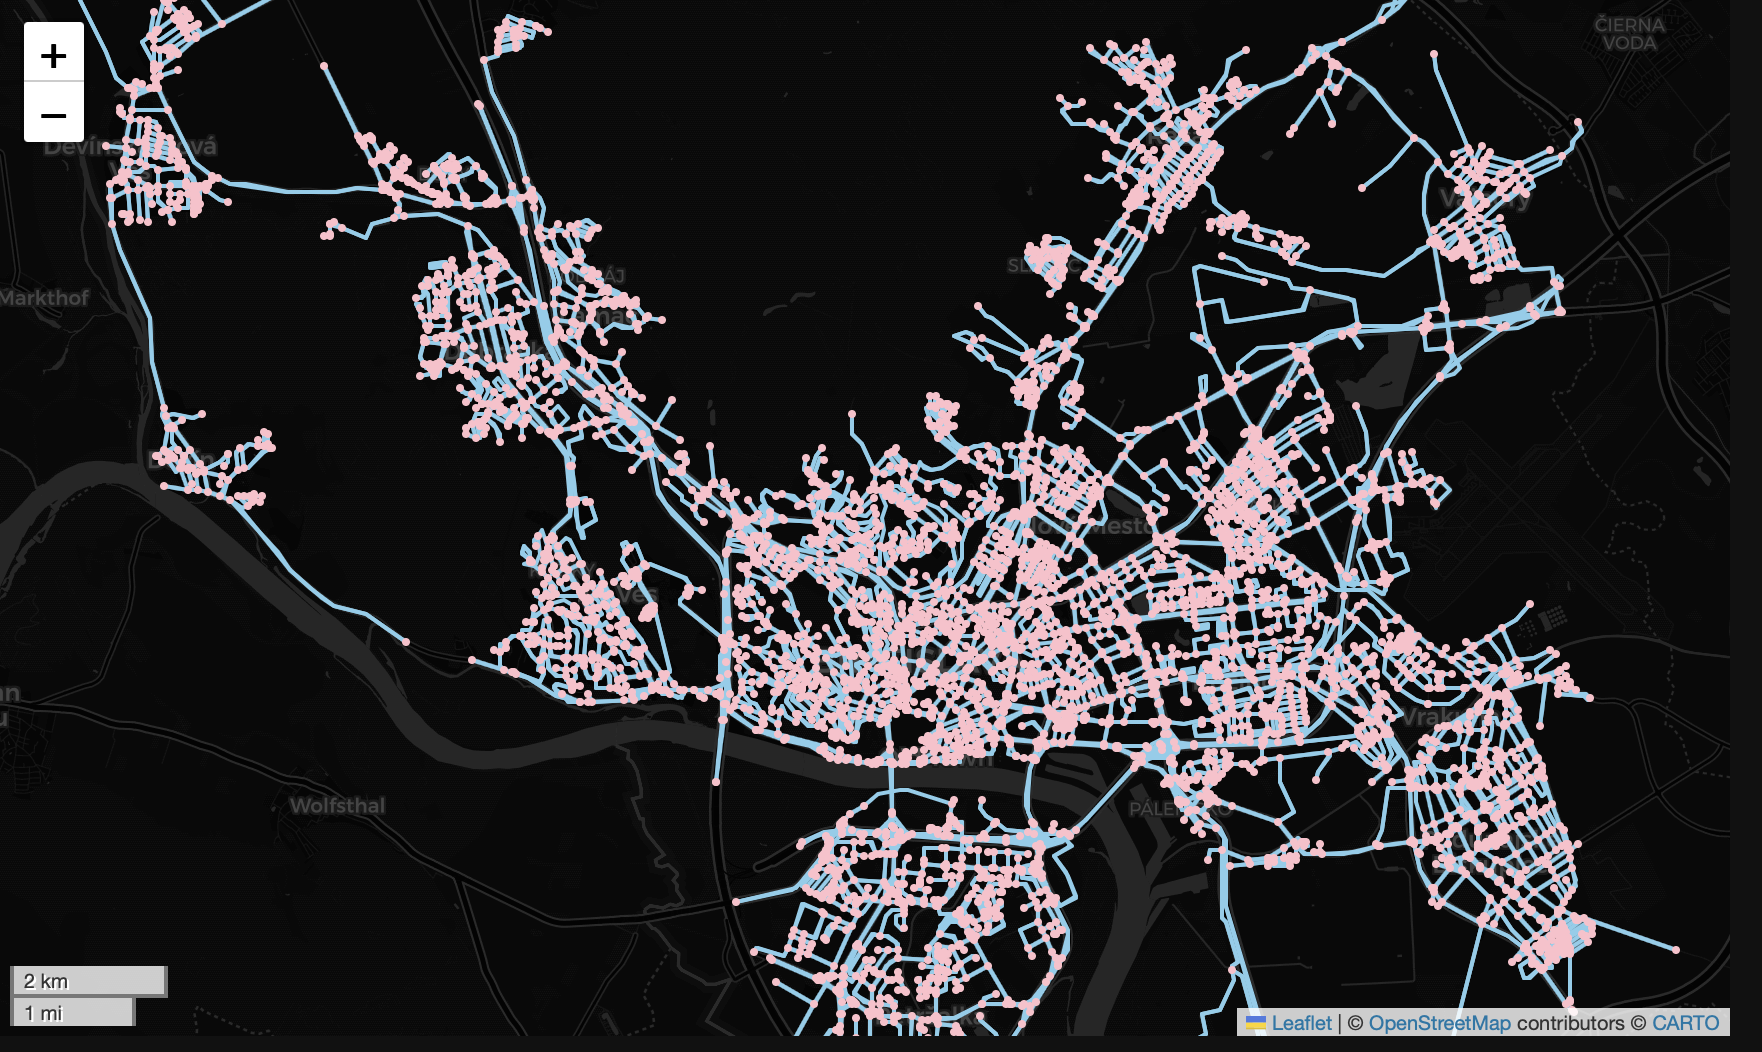

In [ ]:
# explore graph edges interactively, colored by length
edges_B.explore(tiles="cartodbdarkmatter", column="length", cmap="plasma")

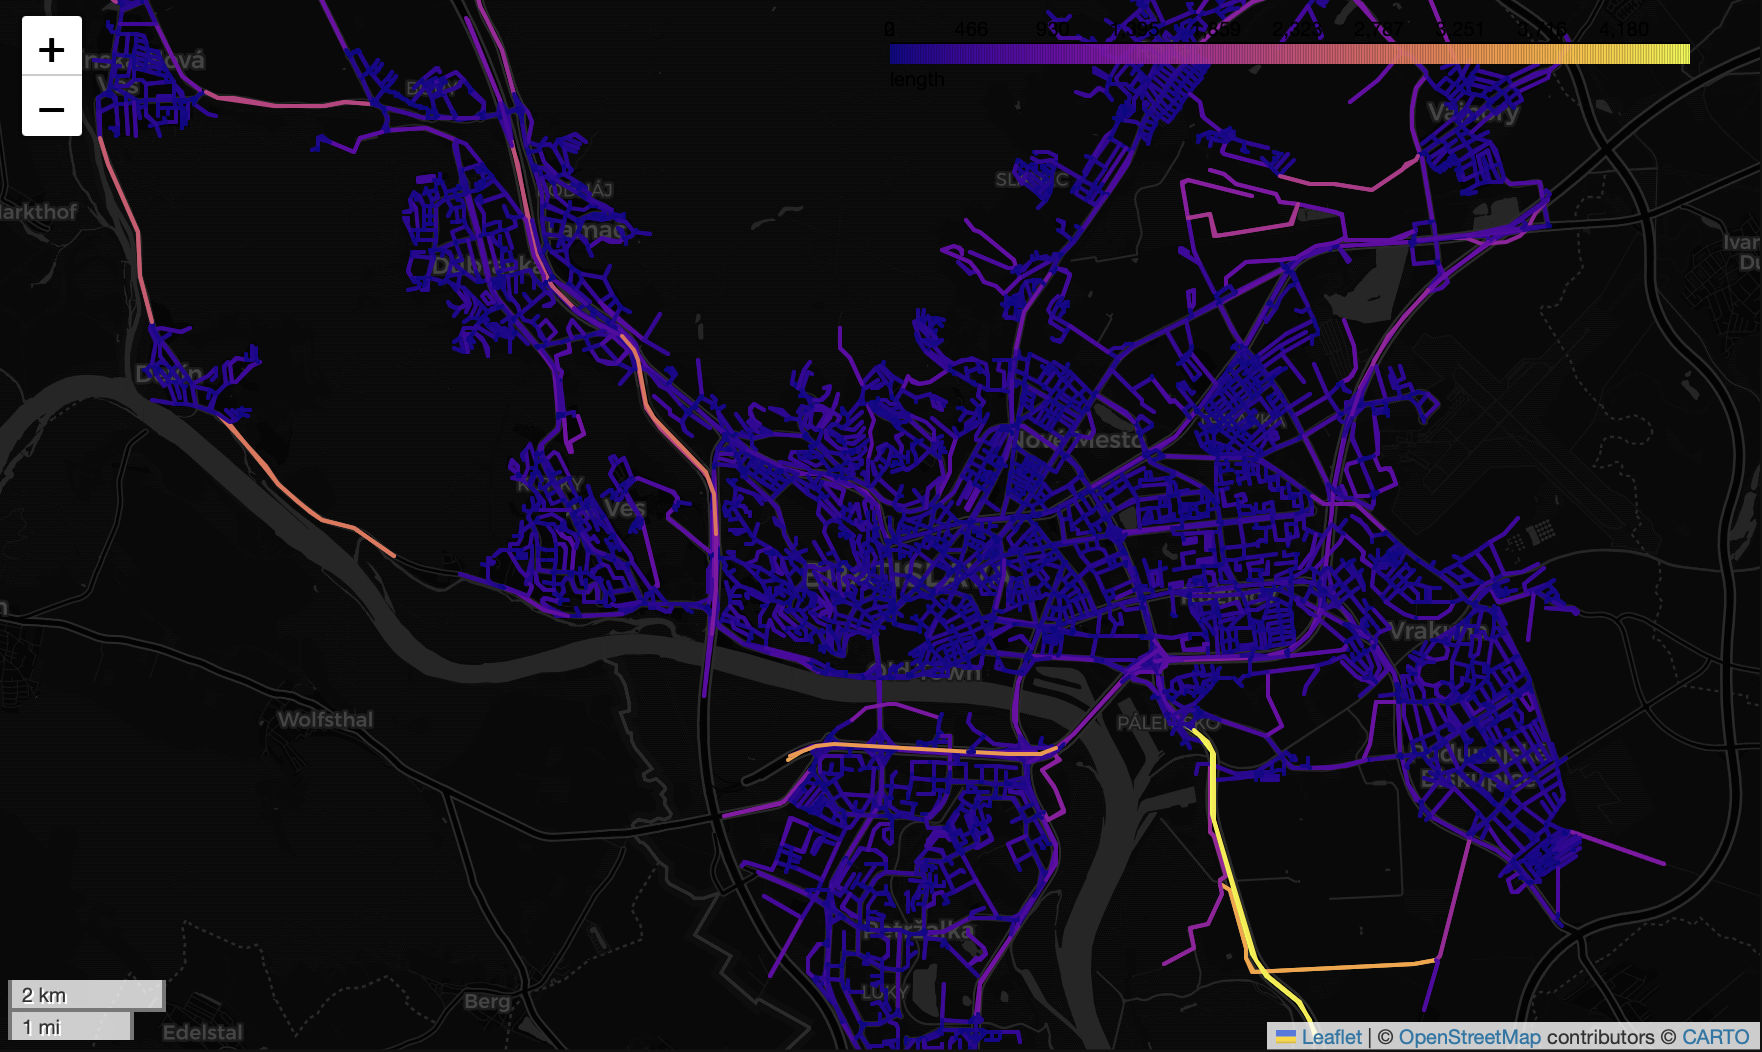

In [ ]:
# explore graph nodes interactively, colored by betweenness centrality
nx.set_node_attributes(B, nx.betweenness_centrality(B, weight="length"), name="bc")
nodes_B = ox.graph_to_gdfs(B, edges=False)
nodes_B.explore(tiles="cartodbdarkmatter", column="bc", marker_kwds={"radius": 2})

#### 2.8 Export the street network to a GeoPackage (.gpkg) file. 
Ensure that the exported file contains both node and edge attributes. Demonstrate that the new GeoPackage can be used and read in Python using any of the libraries we have 

In [79]:
# Save graph to disk as geopackage (for GIS) or graphml file (for gephi etc)
ox.save_graph_geopackage(B, filepath="./Lab5_Data/BAnetwork.gpkg")
ox.save_graphml(B, filepath="./Lab5_Data/BAnetwork.graphml")

#### 2.9 Extract other urban elements and plot them
Lastly, we extract and visualize some urban elements including railways, highways, retail and commercial amenities. To do this we consult the module's documentation: https://osmnx.readthedocs.io/en/stable/user-reference.html#module-osmnx.plot.

In [ ]:
# Map railway network in Bratislava
BA = ox.graph_from_place(
    "Bratislava, Slovakia",
    retain_all=False,
    truncate_by_edge=True,
    simplify=True,
    custom_filter='["railway"]',
)

fig, ax = ox.plot_graph(BA, node_size=0, edge_color="w", edge_linewidth=0.2)

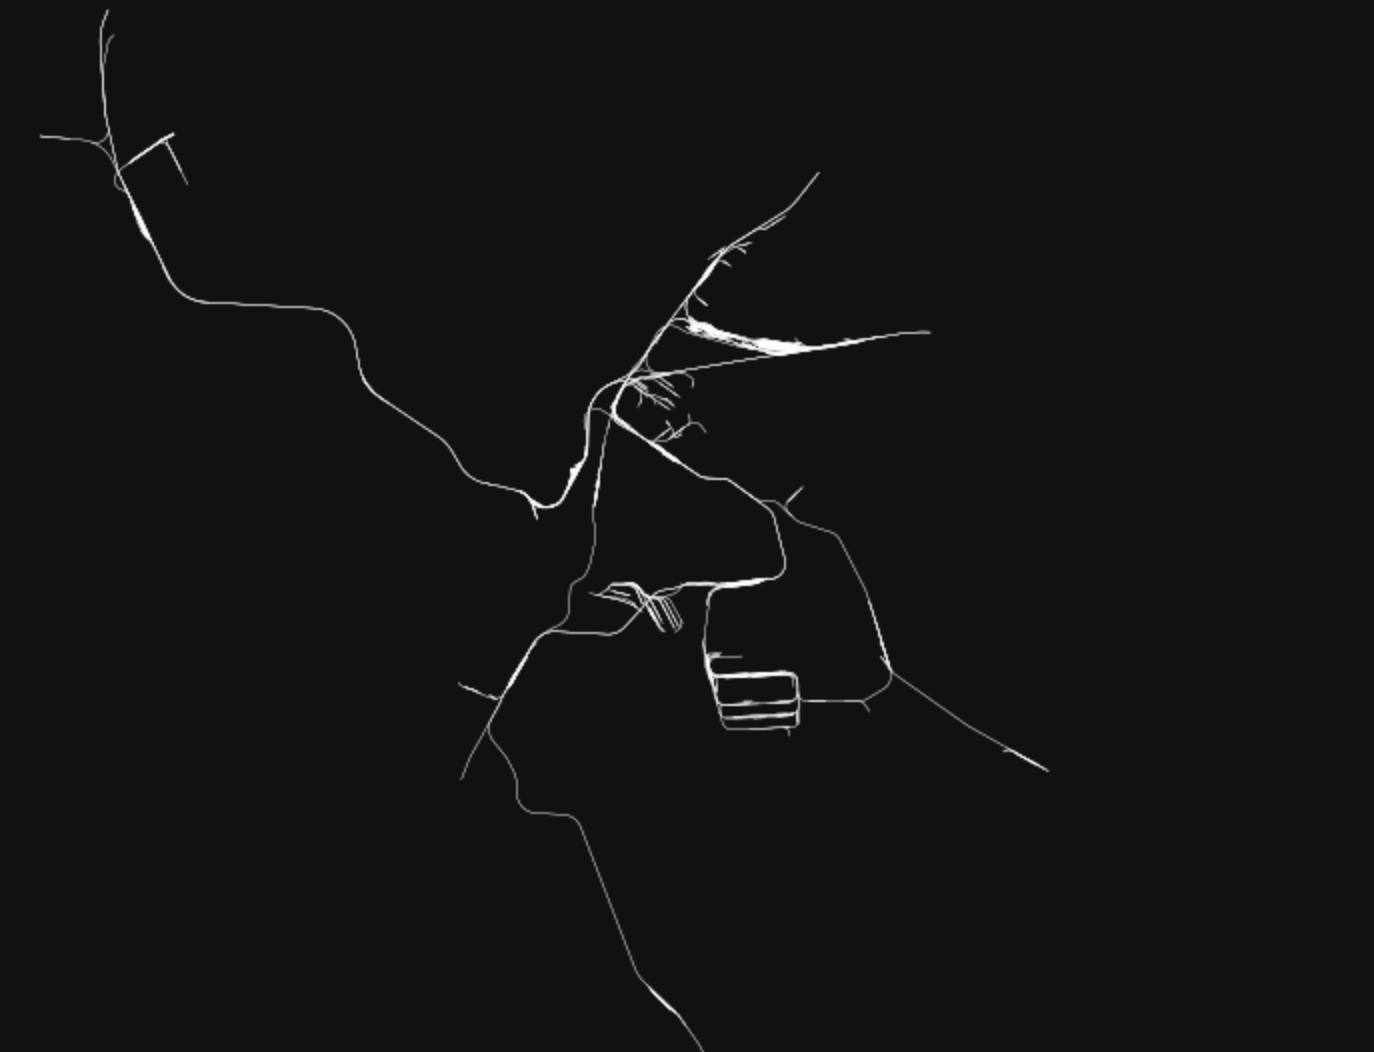

In [ ]:
# Map highway network in Bratislava
BA = ox.graph_from_place(
    "Bratislava, Slovakia",
    retain_all=False,
    truncate_by_edge=True,
    simplify=True,
    custom_filter='["highway"]',
)

fig, ax = ox.plot_graph(BA, node_size=0, edge_color="y", edge_linewidth=0.2)

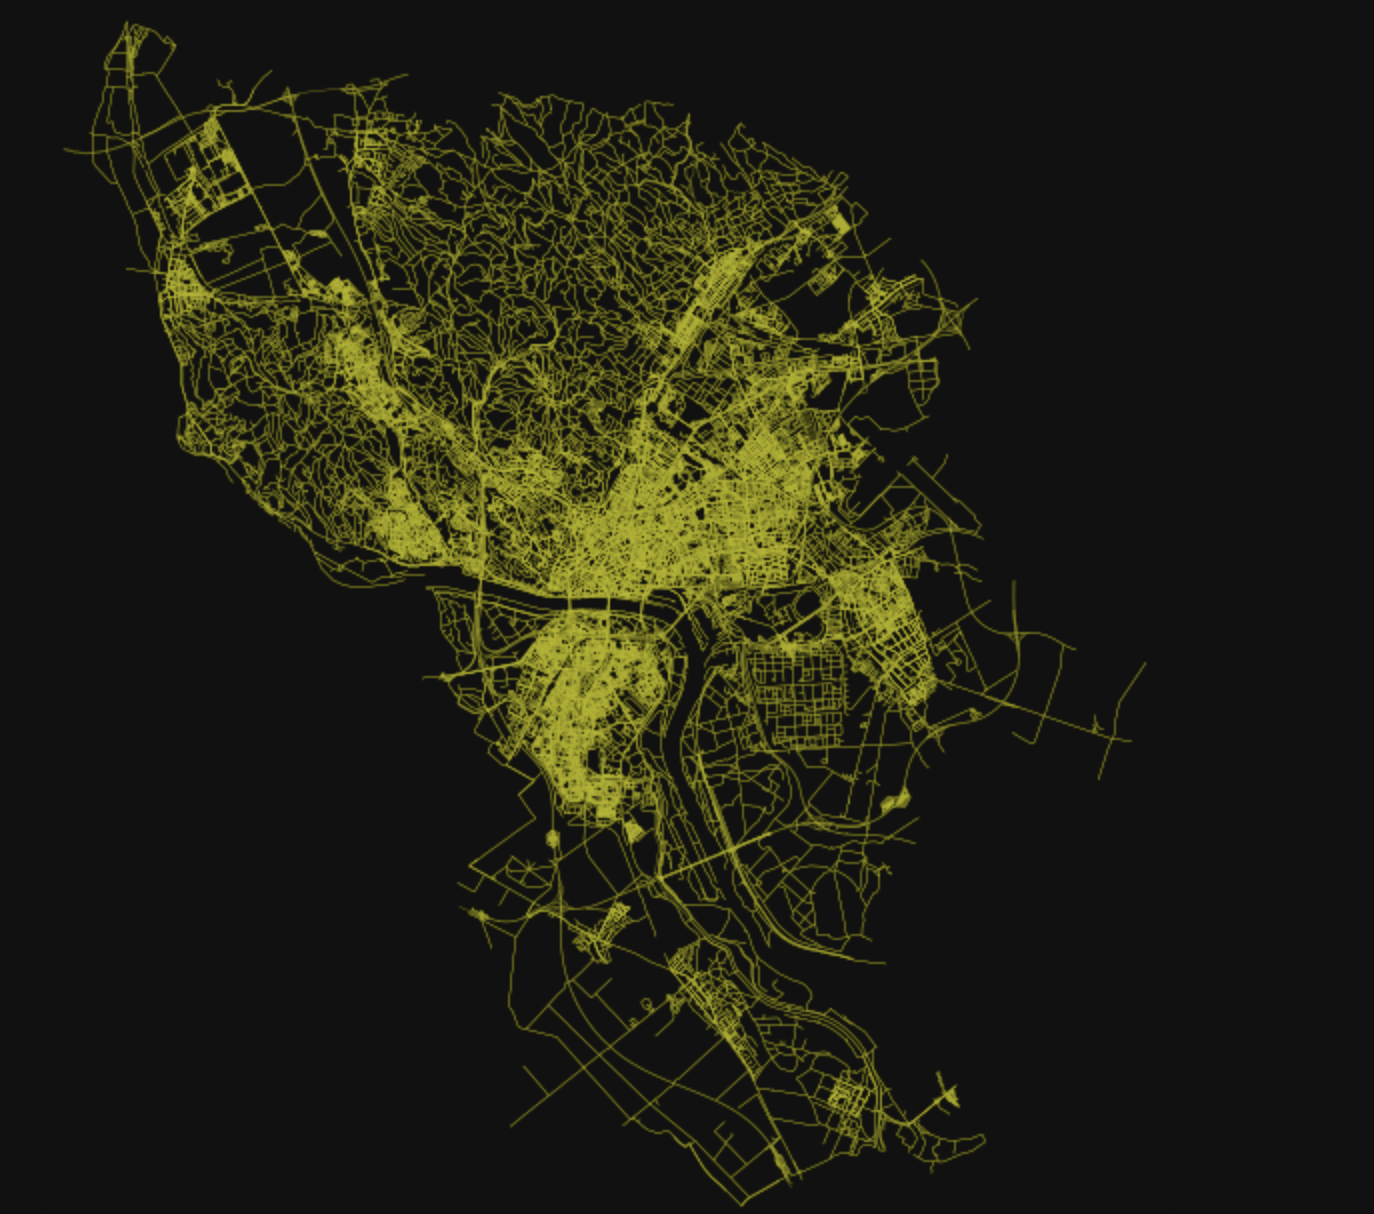

In [108]:
# Define the place and tags: retail and commercial amenities
place = "Staré mesto, Bratislava, Slovakia"
tags = {'amenity':True, 'landuse':['retail','commercial']}

# Retrieve the OpenStreetMap features
features = ox.geometries_from_place(place, tags)

# Display the shape of the resulting GeoDataFrame
print(features.shape)

(3448, 383)


In [ ]:
# Plot it
fig, ax = ox.plot_footprints(features, figsize=(10, 8))

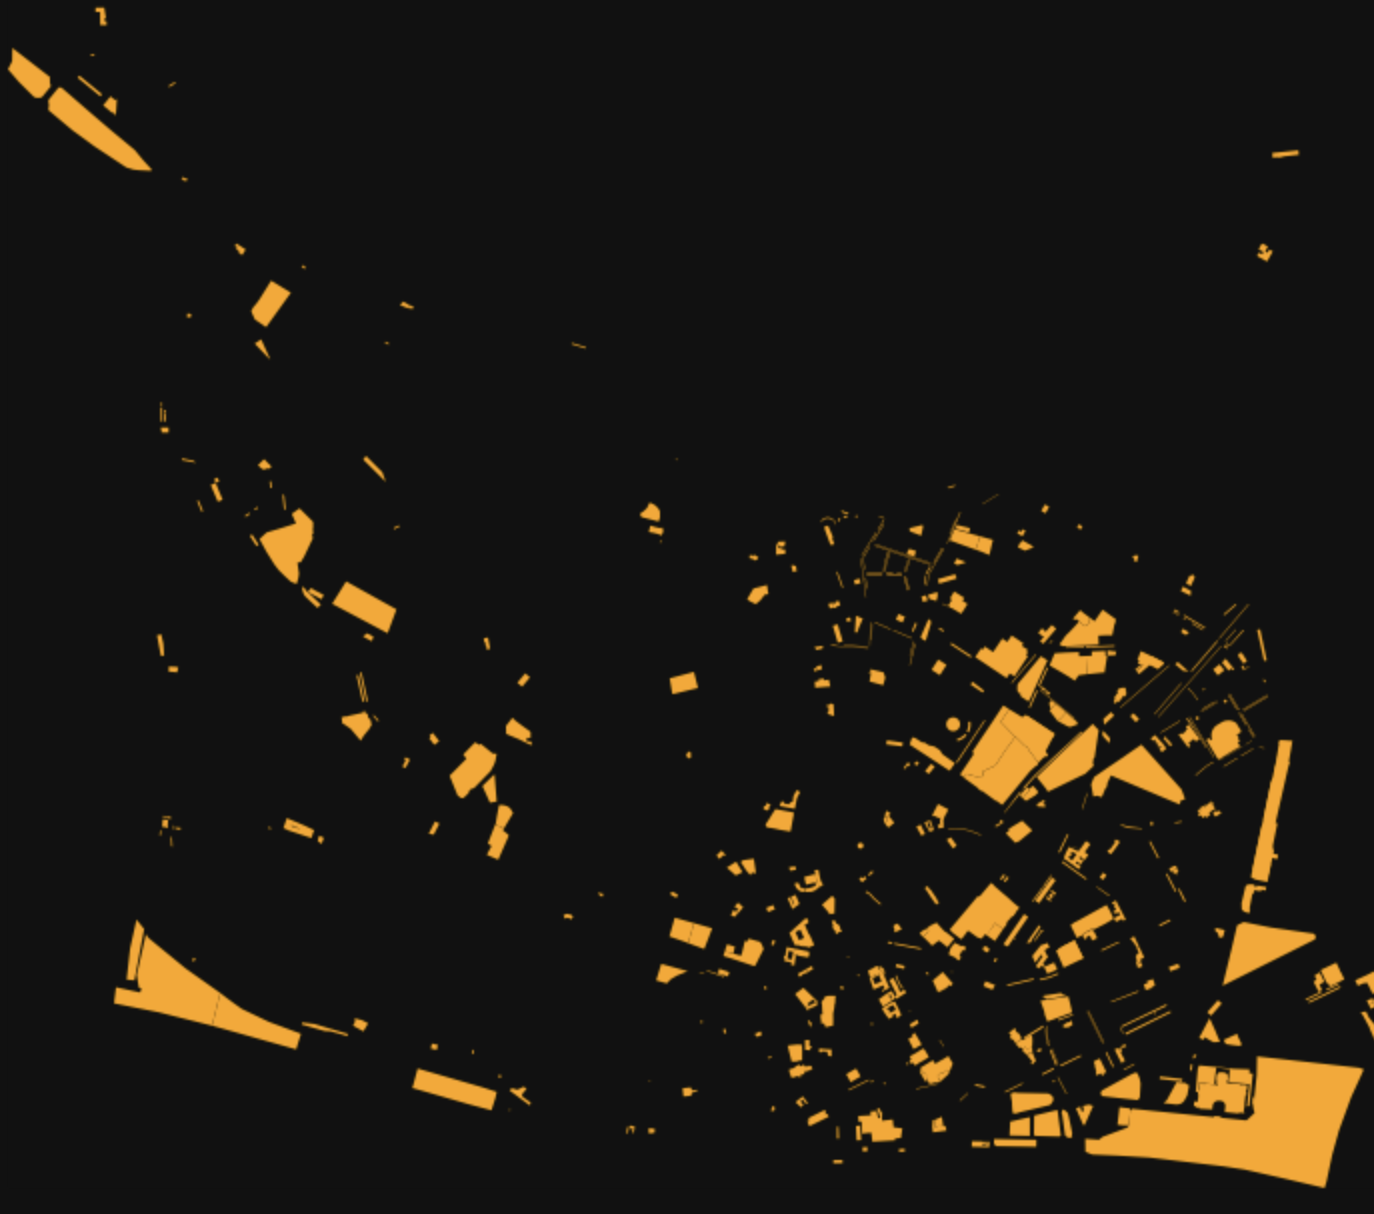